# Multiple Linear Regression

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Importing the Dataset

In [2]:
dataset = pd.read_csv('50_Startups.csv')

In [3]:
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Taking care of Missing data

In [4]:
dataset.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<AxesSubplot:>

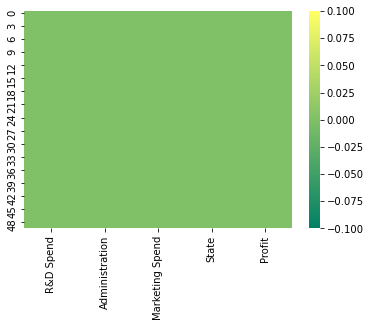

In [5]:
sns.heatmap(dataset.isna(),cbar=True,cmap='summer')

## Visualising the Data

### Scatter Plot

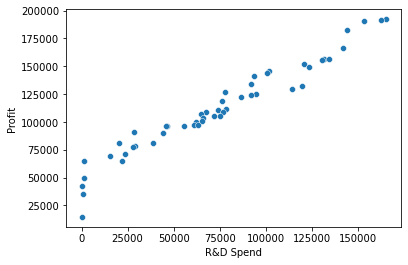

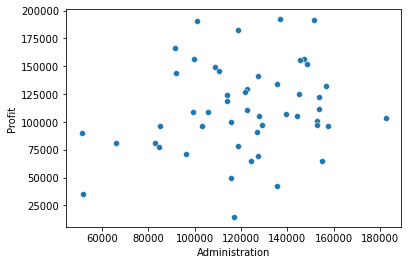

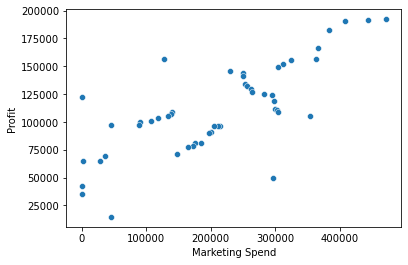

In [6]:
df = dataset.drop(['State','Profit'],axis = 1)
for i in df:
    sns.scatterplot(x = i, y = 'Profit' , data = dataset)
    plt.show()

### Regression Plot

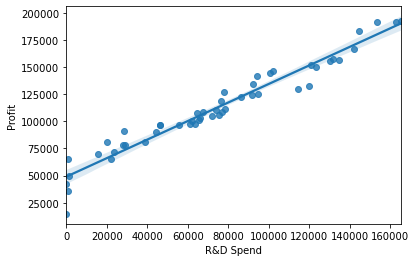

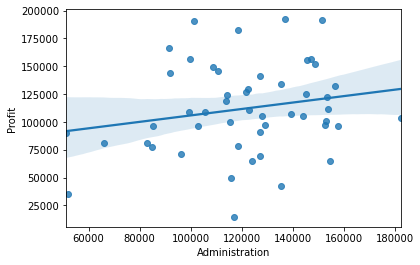

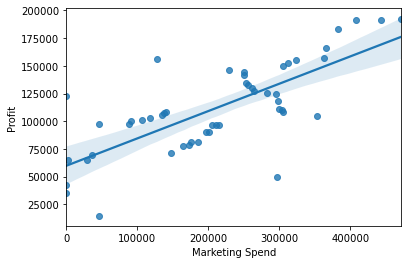

In [7]:
for i in df:
    sns.regplot(x = i, y = 'Profit' , data = dataset)
    plt.show()

### Categorical Plot

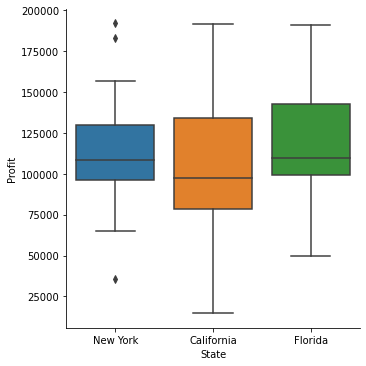

In [8]:
sns.catplot(x = 'State' , y = 'Profit' ,kind = 'box', data = dataset)
plt.show()

## Encoding Categorical Data

In [9]:
dataset = pd.get_dummies(dataset,columns=['State'])

In [10]:
dataset

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [11]:
x = dataset.drop('Profit',axis = 1)

In [12]:
x

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


In [13]:
y = dataset['Profit']

In [14]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [16]:
x_train

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
32,63408.86,129219.61,46085.25,1,0,0
39,38558.51,82982.09,174999.30,1,0,0
21,78389.47,153773.43,299737.29,0,0,1
36,28663.76,127056.21,201126.82,0,1,0
19,86419.70,153514.11,0.00,0,0,1
42,23640.93,96189.63,148001.11,1,0,0
49,0.00,116983.80,45173.06,1,0,0
26,75328.87,144135.98,134050.07,0,1,0
22,73994.56,122782.75,303319.26,0,1,0
13,91992.39,135495.07,252664.93,1,0,0


In [17]:
x_test

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
27,72107.60,127864.55,353183.81,0,0,1
35,46014.02,85047.44,205517.64,0,0,1
40,28754.33,118546.05,172795.67,1,0,0
38,20229.59,65947.93,185265.10,0,0,1
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
48,542.05,51743.15,0.00,0,0,1
29,65605.48,153032.06,107138.38,0,0,1
46,1315.46,115816.21,297114.46,0,1,0
31,61136.38,152701.92,88218.23,0,0,1


In [18]:
y_train

32     97427.84
39     81005.76
21    111313.02
36     90708.19
19    122776.86
42     71498.49
49     14681.40
26    105733.54
22    110352.25
13    134307.35
41     77798.83
17    125370.37
45     64926.08
24    108552.04
23    108733.99
4     166187.94
33     96778.92
14    132602.65
30     99937.59
10    146121.95
28    103282.38
44     65200.33
34     96712.80
18    124266.90
20    118474.03
25    107404.34
6     156122.51
7     155752.60
47     42559.73
1     191792.06
16    126992.93
0     192261.83
15    129917.04
5     156991.12
11    144259.40
9     149759.96
8     152211.77
12    141585.52
43     69758.98
37     89949.14
Name: Profit, dtype: float64

In [19]:
y_test

27    105008.31
35     96479.51
40     78239.91
38     81229.06
2     191050.39
3     182901.99
48     35673.41
29    101004.64
46     49490.75
31     97483.56
Name: Profit, dtype: float64

## Training the Multiple Linear Regression model on the Training set

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

## Predicting the Test set Results

In [21]:
y_pred = reg.predict(x_test)

In [22]:
y_pred

array([114664.41715868,  90593.1553162 ,  75692.84151575,  70221.88679651,
       179790.25514872, 171576.9201852 ,  49753.58752028, 102276.65888936,
        58649.37795762,  98272.02561131])

## Model Score on Training data

In [23]:
reg.score(x_train,y_train)

0.942446542689397

## Model Score on Test data

In [24]:
reg.score(x_test,y_test)

0.9649618042060305